In [1]:
## 打开ipython，输入
from IPython.lib import passwd
passwd()

Enter password:  ······
Verify password:  ······


'sha1:df72adedd320:1cfb4f1e6cf94de9e3a00c7a7f696c727df91e53'

In [ ]:
from notebook.auth import passwd; passwd()

# 测试point-transformer

In [1]:
import torch
from point_transformer_pytorch import PointTransformerLayer

attn = PointTransformerLayer(
    dim = 128,
    pos_mlp_hidden_dim = 64,
    attn_mlp_hidden_mult = 4
)

feats = torch.randn(1, 16, 128)
pos = torch.randn(1, 16, 3)
mask = torch.ones(1, 16).bool()

attn(feats, pos, mask = mask) # (1, 16, 128)

tensor([[[ 0.0642, -0.1267, -0.1921,  ..., -0.0090, -0.2466,  0.0445],
         [ 0.0547, -0.0285, -0.2274,  ..., -0.0677, -0.1423, -0.0569],
         [ 0.0277,  0.0397, -0.2060,  ..., -0.1719, -0.1802, -0.2717],
         ...,
         [ 0.1108,  0.0179, -0.1145,  ..., -0.1377, -0.0687, -0.2190],
         [ 0.2059,  0.0150,  0.1726,  ..., -0.2690, -0.0273, -0.2763],
         [ 0.0142, -0.1395, -0.2166,  ..., -0.0240, -0.2744,  0.0111]]],
       grad_fn=<ViewBackward>)

In [3]:
import torch
from point_transformer_pytorch import PointTransformerLayer

attn = PointTransformerLayer(
    dim = 128,
    pos_mlp_hidden_dim = 64,
    attn_mlp_hidden_mult = 4,
    num_neighbors = 16          # only the 16 nearest neighbors would be attended to for each point
)

feats = torch.randn(1, 2048, 128)
pos = torch.randn(1, 2048, 3)
mask = torch.ones(1, 2048).bool()

attn(feats, pos, mask = mask) # (1, 16, 128)

tensor([[[ 0.0241, -0.0191, -0.0976,  ...,  0.2212, -0.2678,  0.0952],
         [ 0.1390, -0.0343,  0.0007,  ...,  0.2690, -0.1854, -0.0077],
         [ 0.2556,  0.0747,  0.0478,  ...,  0.1785, -0.1505,  0.0986],
         ...,
         [ 0.0556, -0.0697, -0.3138,  ...,  0.3024, -0.4022,  0.1563],
         [ 0.2256,  0.1471, -0.3280,  ...,  0.3766, -0.2010,  0.0834],
         [-0.1004, -0.2484, -0.3162,  ...,  0.4230, -0.0698, -0.1130]]],
       grad_fn=<ViewBackward>)

# 测试torch.cat

In [8]:
import torch
a = torch.randint(1,10,(3,4))
b = torch.randint(1,10,(3,4))
print(a)
print(b)
print(torch.cat([a,b],1)) # dim=1  为横向上拼， dim=0   为纵向上拼
print(torch.cat([a,b],0))

tensor([[9, 8, 8, 6],
        [1, 7, 6, 9],
        [4, 3, 8, 3]])
tensor([[4, 7, 1, 2],
        [6, 2, 8, 6],
        [7, 9, 9, 3]])
tensor([[9, 8, 8, 6, 4, 7, 1, 2],
        [1, 7, 6, 9, 6, 2, 8, 6],
        [4, 3, 8, 3, 7, 9, 9, 3]])
tensor([[9, 8, 8, 6],
        [1, 7, 6, 9],
        [4, 3, 8, 3],
        [4, 7, 1, 2],
        [6, 2, 8, 6],
        [7, 9, 9, 3]])


# torch.max使用
- 输入

input是softmax函数输出的一个tensor
dim是max函数索引的维度0/1，0是每列的最大值，1是每行的最大值
- 输出

函数会返回两个tensor，第一个tensor是每行的最大值；第二个tensor是每行最大值的索引。
[torch.max()使用讲解](https://www.jianshu.com/p/3ed11362b54f)

In [17]:
c = torch.randint(1,10,(4,64,32,512))
# print(c)
d = torch.max(c, 2)[0]  # 第二个维度上，32个值取最大
print(d.shape)  # torch.Size([4, 64, 512])

torch.Size([4, 64, 512])


# nn.Conv2d(last_channel, out_channel, 1)的使用
nn.Conv2d(in_channels=3,out_channels=64,kernel_size=4,stride=2,padding=1)
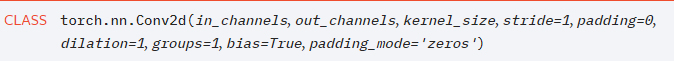

# 测试one—hot编码

In [18]:
import torch.nn as nn

nn.Conv2d(4,4,1)

Conv2d(4, 4, kernel_size=(1, 1), stride=(1, 1))

In [30]:
import torch as np

In [32]:
a = np.randint(0,10,(4,1))

In [33]:
a

tensor([[1],
        [5],
        [3],
        [4]])

In [34]:
y = np.eye(16)

In [35]:
y #(16,16)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0

In [36]:
new_y = y[a]
new_y,new_y.shape  # (4, 1, 16)

(tensor([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]]),
 torch.Size([4, 1, 16]))

In [42]:
B = 4
N = 2048
print(new_y.view(B,16,1))
cls_label_one_hot = new_y.view(B,16,1).repeat(1,1,N)
print(cls_label_one_hot.shape)

tensor([[[0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]])
torch.Size([4, 16, 2048])


In [43]:
print(cls_label_one_hot[0,:,0])
print(cls_label_one_hot[0,:,1])
cls_label_one_hot

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

## target处理

In [15]:
import torch
target = torch.randint(1,10,(4,2048));
print(target)
print(target.view(-1, 1)) 
print(target.view(-1, 1).shape) # torch.Size([8192, 1])
target = target.view(-1, 1)[:, 0] 
print(target)
print(target.shape)  # torch.Size([8192])

tensor([[7, 4, 4,  ..., 3, 9, 4],
        [7, 1, 8,  ..., 3, 9, 5],
        [8, 4, 7,  ..., 2, 1, 4],
        [9, 2, 8,  ..., 5, 9, 1]])
tensor([[7],
        [4],
        [4],
        ...,
        [5],
        [9],
        [1]])
torch.Size([8192, 1])
tensor([7, 4, 4,  ..., 5, 9, 1])
torch.Size([8192])


In [49]:
import numpy as np
arr = np.array([0.729603,0.447213
 ,0.420438
 ,0.536066
 ,0.867272
 ,0.543938
 ,0.773823
 ,0.789088
 ,0.738931
 ,0.953616
 ,0.226290
 ,0.594772
 ,0.643531
 ,0.226034
 ,0.458957
 ,0.769065])
np.mean(arr)

0.6074148125000001

## loss处理

In [19]:
import torch
import torch.nn.functional as F
input = torch.randn(3, 5, requires_grad=True)
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 4])
print('input:{}\n target:{}'.format(input,target))
# nll_loss 函数接收两个tensor第一个是模型的output，第二个是label target，output中每一行与一个标签中每一列的元素对应，根据target的取值找出output行中对应位置元素，求和取平均值。
print('log softmax:{}'.format(F.log_softmax(input,dim=1)))  
output = F.nll_loss(F.log_softmax(input,dim=1), target)
print('output:{}'.format(output))
output.backward()

input:tensor([[ 1.7159e+00, -4.0688e-01, -2.1283e+00, -5.5518e-01,  1.2841e+00],
        [-1.6106e+00,  2.3098e-03,  4.9322e-02,  7.8797e-01,  2.3460e+00],
        [ 8.8822e-02, -5.9494e-01, -8.9790e-01, -3.3120e-01, -9.8837e-01]],
       requires_grad=True)
 target:tensor([1, 0, 4])
log softmax:tensor([[-0.6385, -2.7613, -4.4827, -2.9096, -1.0703],
        [-4.3117, -2.6988, -2.6517, -1.9131, -0.3550],
        [-1.0561, -1.7398, -2.0428, -1.4761, -2.1333]],
       grad_fn=<LogSoftmaxBackward>)
output:3.068748712539673


## 点云数据平移

In [11]:
import torch
import numpy as np

In [22]:
# batch_data = torch.randfloat(1.0,10.0,(4,2048,3))
torch.rand(1,10,(4,2048))

TypeError: rand(): argument 'size' must be tuple of ints, but found element of type tuple at pos 3

In [8]:
print(batch_data.shape)
batch_data

torch.Size([4, 2048, 3])


tensor([[[5, 6, 3],
         [1, 5, 9],
         [3, 6, 5],
         ...,
         [7, 6, 9],
         [9, 3, 5],
         [5, 4, 2]],

        [[6, 7, 9],
         [1, 7, 4],
         [8, 9, 5],
         ...,
         [6, 9, 4],
         [5, 7, 8],
         [9, 8, 4]],

        [[8, 9, 5],
         [5, 6, 3],
         [7, 3, 7],
         ...,
         [1, 1, 7],
         [9, 5, 1],
         [4, 2, 7]],

        [[8, 1, 5],
         [1, 6, 8],
         [5, 3, 6],
         ...,
         [4, 8, 3],
         [1, 4, 1],
         [7, 4, 6]]])

In [14]:
B, N, C = batch_data.shape
scales = np.random.uniform(0.8, 1.25, B)  # 均匀采样
print(B,N,C)
print(scales)  # 在0.8-1.25中随机采样

4 2048 3
[0.89245353 0.95670208 1.1988009  0.94478742]


In [16]:
for batch_index in range(B):
    batch_data[batch_index,:,:] *= scales[batch_index]
print(batch_data)

RuntimeError: result type Float can't be cast to the desired output type Long